# GAN图像生成

## 模型简介

生成式对抗网络(Generative Adversarial Networks，GAN)是一种生成式机器学习模型，是近年来复杂分布上无监督学习最具前景的方法之一。

最初，GAN由Ian J. Goodfellow于2014年发明，并在论文[Generative Adversarial Nets](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf)中首次进行了描述，其主要由两个不同的模型共同组成——生成器(Generative Model)和判别器(Discriminative Model)：

- 生成器的任务是生成看起来像训练图像的“假”图像；
- 判别器需要判断从生成器输出的图像是真实的训练图像还是虚假的图像。

GAN通过设计生成模型和判别模型这两个模块，使其互相博弈学习产生了相当好的输出。

GAN模型的核心在于提出了通过对抗过程来估计生成模型这一全新框架。在这个框架中，将会同时训练两个模型——捕捉数据分布的生成模型 $G$ 和估计样本是否来自训练数据的判别模型 $D$ 。

在训练过程中，生成器会不断尝试通过生成更好的假图像来骗过判别器，而判别器在这过程中也会逐步提升判别能力。这种博弈的平衡点是，当生成器生成的假图像和训练数据图像的分布完全一致时，判别器拥有50%的真假判断置信度。

用 $x$ 代表图像数据，用 $D(x)$表示判别器网络给出图像判定为真实图像的概率。在判别过程中，$D(x)$ 需要处理作为二进制文件的大小为 $1\times 28\times 28$ 的图像数据。当 $x$ 来自训练数据时，$D(x)$ 数值应该趋近于 $1$ ；而当 $x$ 来自生成器时，$D(x)$ 数值应该趋近于 $0$ 。因此 $D(x)$ 也可以被认为是传统的二分类器。

用 $z$ 代表标准正态分布中提取出的隐码(隐向量)，用 $G(z)$：表示将隐码(隐向量) $z$ 映射到数据空间的生成器函数。函数 $G(z)$ 的目标是将服从高斯分布的随机噪声 $z$ 通过生成网络变换为近似于真实分布 $p_{data}(x)$ 的数据分布，我们希望找到 $θ$ 使得 $p_{G}(x;\theta)$ 和 $p_{data}(x)$ 尽可能的接近，其中 $\theta$ 代表网络参数。

$D(G(z))$ 表示生成器 $G$ 生成的假图像被判定为真实图像的概率，如[Generative Adversarial Nets](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf)中所述，$D$ 和 $G$ 在进行一场博弈，$D$ 想要最大程度的正确分类真图像与假图像，也就是参数 $\log D(x)$；而 $G$ 试图欺骗 $D$ 来最小化假图像被识别到的概率，也就是参数 $\log(1−D(G(z)))$。因此GAN的损失函数为：

$$
\min\limits_{G}\max\limits_{D} V(D,G)=E_{x\sim p_{data}\;\,(x)}[\log D(x)]+E_{z\sim p_{z}\,(z)}[\log (1-D(G(z)))]
$$

从理论上讲，此博弈游戏的平衡点是$p_{G}(x;\theta) = p_{data}(x)$，此时判别器会随机猜测输入是真图像还是假图像。下面我们简要说明生成器和判别器的博弈过程：

1. 在训练刚开始的时候，生成器和判别器的质量都比较差，生成器会随机生成一个数据分布。
2. 判别器通过求取梯度和损失函数对网络进行优化，将靠近真实数据分布的数据判定为1，将靠近生成器生成出来数据分布的数据判定为0。
3. 生成器通过优化，生成出更加贴近真实数据分布的数据。
4. 生成器所生成的数据和真实数据达到相同的分布，此时判别器的输出为1/2。

![gan](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.2/tutorials/application/source_zh_cn/cv/images/gan_image.png)

在上图中，蓝色虚线表示判别器，黑色虚线表示真实数据分布，绿色实线表示生成器生成的虚假数据分布，$z$ 表示隐码，$x$ 表示生成的虚假图像 $G(z)$。该图片来源于[Generative Adversarial Nets](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf)。详细的训练方法介绍见原论文。




## 环境准备

开发者拿到香橙派开发板后，首先需要进行硬件资源确认，镜像烧录及CANN和MindSpore版本的升级，才可运行该案例，具体如下：

- 硬件： 香橙派AIpro 24G 20T开发板
- 镜像： 香橙派官网ubuntu镜像
- CANN：8.1.RC1
- MindSpore： 2.6.0

### 镜像烧录

运行该案例需要烧录香橙派官网ubuntu镜像，烧录流程参考[昇思MindSpore官网--香橙派开发专区--环境搭建指南--镜像烧录](https://www.mindspore.cn/tutorials/zh-CN/r2.6.0/orange_pi/environment_setup.html)章节。

### CANN升级

CANN升级参考[昇思MindSpore官网--香橙派开发专区--环境搭建指南--CANN升级](https://www.mindspore.cn/docs/zh-CN/r2.4.10/orange_pi/environment_setup.html#3-cann%E5%8D%87%E7%BA%A7)章节。

### MindSpore升级

MindSpore升级参考[昇思MindSpore官网--香橙派开发专区--环境搭建指南--MindSpore升级](https://www.mindspore.cn/docs/zh-CN/r2.4.10/orange_pi/environment_setup.html#4-mindspore%E5%8D%87%E7%BA%A7)章节。

## 设置运行环境

由于资源限制，需开启性能优化模式，具体设置如下参数：

 max_device_memory="2GB" : 设置设备可用的最大内存为2GB。

 mode=mindspore.PYNATIVE_MODE : 表示在PYNATIVE_MODE模式中运行。

 device_target="Ascend" : 表示待运行的目标设备为Ascend。

 #jit_config={"jit_level":"O2"} : 编译优化级别开启极致性能优化，使用下沉的执行方式。
 mint不支持O2
 ascend_config={"precision_mode":"allow_mix_precision"} : 自动混合精度，自动将部分算子的精度降低到float16或bfloat16。

In [8]:
import mindspore as ms
import numpy as np
import os
import matplotlib.pyplot as plt
from download import download
from tqdm import tqdm

# 环境配置
ms.set_context(
    mode=ms.PYNATIVE_MODE,
    device_target="Ascend",
    device_id=0,
    max_device_memory="2GB"
)
from mindspore.device_context import ascend
ascend.op_precision.precision_mode("allow_mix_precision")

# 2. 全局参数
latent_size = 100
img_size = 28
batch_size = 25  # 生成25张图，5×5网格显示

[WARNING] ME(16812:255086020149280,MainProcess):2025-10-07-15:00:09.964.233 [mindspore/context.py:1346] For 'context.set_context' in Ascend backend, the backend is already initialized, please set it before the definition of any Tensor and Parameter, and the instantiation and execution of any operation and net, otherwise the settings may not take effect. 
[WARNING] ME(16812:255086020149280,MainProcess):2025-10-07-15:00:09.965.727 [mindspore/context.py:1402] For 'context.set_context', the parameter 'device_target' will be deprecated and removed in a future version. Please use the api mindspore.set_device() instead.
[WARNING] ME(16812:255086020149280,MainProcess):2025-10-07-15:00:09.968.609 [mindspore/context.py:1402] For 'context.set_context', the parameter 'device_id' will be deprecated and removed in a future version. Please use the api mindspore.set_device() instead.
[WARNING] ME(16812:255086020149280,MainProcess):2025-10-07-15:00:09.969.631 [mindspore/context.py:1402] For 'context.se

## 数据集准备与处理

### 数据集简介

[MNIST手写数字数据集](http://yann.lecun.com/exdb/mnist/)是NIST数据集的子集，共有70000张手写数字图片，包含60000张训练样本和10000张测试样本，数字图片为二进制文件，图片大小为28\*28，单通道。图片已经预先进行了尺寸归一化和中心化处理。

本案例将使用MNIST手写数字数据集来训练一个生成式对抗网络，使用该网络模拟生成手写数字图片。

### 数据集下载

使用`download`接口下载数据集，并将下载后的数据集自动解压到当前目录下。数据下载之前需要使用`pip install download`安装`download`包。

下载解压后的数据集目录结构如下：

```text
./MNIST_Data/
├─ train
│ ├─ train-images-idx3-ubyte
│ └─ train-labels-idx1-ubyte
└─ test
   ├─ t10k-images-idx3-ubyte
   └─ t10k-labels-idx1-ubyte
```

数据下载的代码如下：

In [2]:
#install download

!pip install download

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
# 数据下载
from download import download

url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/MNIST_Data.zip"
download(url, ".", kind="zip", replace=True)


file_sizes: 100%|██████████████████████████| 10.8M/10.8M [00:02<00:00, 3.78MB/s]
Extracting zip file...
Successfully downloaded / unzipped to .


'.'

### 数据加载

使用MindSpore自己的`MnistDatase`接口，读取和解析MNIST数据集的源文件构建数据集。然后对数据进行一些前处理，包含数据转换、数据增强、批量处理。

In [2]:
import numpy as np
import mindspore.dataset as ds

batch_size = 128
latent_size = 100  # 隐码的长度

train_dataset = ds.MnistDataset(dataset_dir='./MNIST_Data/train')
test_dataset = ds.MnistDataset(dataset_dir='./MNIST_Data/test')

def data_load(dataset):
    dataset1 = ds.GeneratorDataset(dataset, ["image", "label"], shuffle=True, python_multiprocessing=False)
    # 数据增强
    mnist_ds = dataset1.map(
        operations=lambda x: (x.astype("float32"), np.random.normal(size=latent_size).astype("float32")),
        output_columns=["image", "latent_code"])
    mnist_ds = mnist_ds.project(["image", "latent_code"])

    # 批量操作
    mnist_ds = mnist_ds.batch(batch_size, True)

    return mnist_ds

mnist_ds = data_load(train_dataset)

iter_size = mnist_ds.get_dataset_size()
print('Iter size: %d' % iter_size)

Iter size: 468


### 数据集可视化

通过`create_dict_iterator`函数将数据转换成字典迭代器，然后使用`matplotlib`模块可视化部分训练数据。

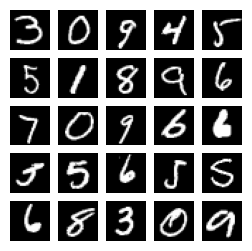

In [3]:
import matplotlib.pyplot as plt

data_iter = next(mnist_ds.create_dict_iterator(output_numpy=True))
figure = plt.figure(figsize=(3, 3))
cols, rows = 5, 5
for idx in range(1, cols * rows + 1):
    image = data_iter['image'][idx]
    figure.add_subplot(rows, cols, idx)
    plt.axis("off")
    plt.imshow(image.squeeze(), cmap="gray")
plt.show()

## 模型构建

本案例实现中所搭建的 GAN 模型结构与原论文中提出的 GAN 结构大致相同，但由于所用数据集 MNIST 为单通道小尺寸图片，可识别参数少，便于训练，我们在判别器和生成器中采用全连接网络架构和 `ReLU` 激活函数即可达到令人满意的效果，且省略了原论文中用于减少参数的 `Dropout` 策略和可学习激活函数 `Maxout`。

### 生成器

生成器 `Generator` 的功能是将隐码映射到数据空间。由于数据是图像，这一过程也会创建与真实图像大小相同的灰度图像(或 RGB 彩色图像)。在本案例演示中，该功能通过五层 `Dense` 全连接层来完成的，每层都与 `BatchNorm1d` 批归一化层和 `ReLU` 激活层配对，输出数据会经过 `Tanh` 函数，使其返回 [-1,1] 的数据范围内。注意实例化生成器之后需要修改参数的名称，不然静态图模式下会报错。

In [9]:
class GenHybrid(ms.nn.Cell):
    def __init__(self):
        super().__init__()
        # 关键：SequentialCell命名为model，参数名会带"model."层级
        self.model = ms.nn.SequentialCell([
            ms.nn.Dense(latent_size, 128, dtype=ms.float16),  # 0: [N,100]→[N,128]
            ms.mint.nn.ReLU(),                                # mint接口激活
            ms.nn.Dense(128, 256, dtype=ms.float16),         # 2: [N,128]→[N,256]
            ms.mint.nn.ReLU(),                                # mint接口激活
            ms.nn.Dense(256, 512, dtype=ms.float16),         # 4: [N,256]→[N,512]
            ms.mint.nn.ReLU(),                                # mint接口激活
            ms.nn.Dense(512, 1024, dtype=ms.float16),        # 6: [N,512]→[N,1024]
            ms.mint.nn.ReLU(),                                # mint接口激活
            ms.nn.Dense(1024, img_size * img_size, dtype=ms.float16),  # 8: [N,1024]→[N,784]
            ms.mint.nn.Tanh()                                 # mint接口激活
        ])
        # 关键：参数名前缀设为"generatormodel."，最终参数名是"generatormodel.model.0.weight"
        self.update_parameters_name('generatormodel.')
        # 打印真实参数名，方便权重映射
        self._print_real_param_names()

    def _print_real_param_names(self):
        """打印模型真实参数名，确认映射关系"""
        print("="*50)
        print("模型真实参数名（用于权重映射）：")
        for param in self.get_parameters():
            print(f"  {param.name}")
        print("="*50)

    def construct(self, x):
        x = ms.ops.cast(x, ms.float16)  # 适配硬件FP16
        out = self.model(x)
        out = ms.ops.cast(out, ms.float32)  # 转FP32便于显示
        # 输出形状：[N,1,28,28]（匹配图像格式）
        return ms.ops.reshape(out, (-1, 1, img_size, img_size))

### 判别器

如前所述，判别器 `Discriminator` 是一个二分类网络模型，输出判定该图像为真实图的概率。主要通过一系列的 `Dense` 层和 `LeakyReLU` 层对其进行处理，最后通过 `Sigmoid` 激活函数，使其返回 [0, 1] 的数据范围内，得到最终概率。注意实例化判别器之后需要修改参数的名称，不然静态图模式下会报错。

In [10]:
class Discriminator(ms.nn.Cell):
    def __init__(self, auto_prefix=True):
        super().__init__(auto_prefix=auto_prefix)
        self.model = ms.nn.SequentialCell()
        # [N, 784] -> [N, 512]
        self.model.append(ms.mint.nn.Linear(img_size * img_size, 512))  # 输入特征数为784，输出为512
        self.model.append(ms.nn.LeakyReLU())  # 默认斜率为0.2的非线性映射激活函数
        # [N, 512] -> [N, 256]
        self.model.append(ms.mint.nn.Linear(512, 256))  # 进行一个线性映射
        self.model.append(ms.nn.LeakyReLU())
        # [N, 256] -> [N, 1]
        self.model.append(ms.mint.nn.Linear(256, 1))
        self.model.append(ms.nn.Sigmoid())  # 二分类激活函数，将实数映射到[0,1]

    def construct(self, x):
        x_flat = ops.reshape(x, (-1, img_size * img_size))
        return self.model(x_flat)

net_d = Discriminator()
net_d.update_parameters_name('discriminator')

## 权重加载

下面我们下载已有的生成器网络模型参数文件加载到生成器网络中。

In [11]:
def load_weights_fixed(net, ckpt_path="./Generator199.ckpt"):
    # 下载权重
    if not os.path.exists(ckpt_path):
        url = "https://modelers.cn/coderepo/web/v1/file/MindSpore-Lab/cluoud_obs/main/media/examples/mindspore-courses/orange-pi-online-infer/09-GAN/Generator199.ckpt"
        download(url, ckpt_path, replace=True)
    
    # 加载原始权重
    raw_params = ms.load_checkpoint(ckpt_path)
    # 获取模型参数字典（name: Parameter）
    net_params = {param.name: param for param in net.get_parameters()}
    # 权重索引映射：原权重有BN层，索引5→4、8→6、11→8；且要加"model."层级
    idx_map = {"5":"4", "8":"6", "11":"8"}
    loaded_count = 0

    print("\n开始映射权重：")
    for old_name, tensor_val in raw_params.items():
        if old_name.startswith("optim_g"):
            # 步骤1：去掉"optim_g"前缀 → "generatormodel.0.weight"
            new_name = old_name.replace("optim_g", "")
            # 步骤2：修复层索引（原5→4、8→6、11→8）
            for old_idx, new_idx in idx_map.items():
                new_name = new_name.replace(f".{old_idx}.", f".{new_idx}.")
            # 步骤3：插入"model."层级 → "generatormodel.model.0.weight"
            new_name = new_name.replace("generatormodel.", "generatormodel.model.")
            
            # 只加载weight和bias（模型无BN层）
            if "weight" in new_name or "bias" in new_name:
                if new_name in net_params:
                    param = net_params[new_name]
                    # 检查形状匹配
                    if tensor_val.shape == param.shape:
                        # 赋值并转FP16
                        param.set_data(tensor_val.astype(ms.float16))
                        loaded_count += 1
                        print(f"✅ 成功：{old_name:40} → {new_name:40}")
                    else:
                        print(f"❌ 形状不匹配：{new_name}（权重{tensor_val.shape} vs 模型{param.shape}）")
                else:
                    print(f"⚠️ 模型无此参数：{new_name}（跳过）")
    
    # 验证加载效果
    print(f"\n权重加载完成：共成功加载 {loaded_count}/10 个核心参数")
    if loaded_count == 0:
        print("⚠️ 警告：未加载任何参数！生成的将是随机图像（二维码）")
    else:
        print("✅ 权重加载有效！生成的将是手写数字图像")
    return net

## 模型推理

下面我们通过加载生成器网络模型参数文件来生成图像，代码如下：

模型真实参数名（用于权重映射）：
  generatormodel.model.0.weight
  generatormodel.model.0.bias
  generatormodel.model.2.weight
  generatormodel.model.2.bias
  generatormodel.model.4.weight
  generatormodel.model.4.bias
  generatormodel.model.6.weight
  generatormodel.model.6.bias
  generatormodel.model.8.weight
  generatormodel.model.8.bias

开始映射权重：
✅ 成功：optim_ggeneratormodel.0.weight           → generatormodel.model.0.weight           
✅ 成功：optim_ggeneratormodel.0.bias             → generatormodel.model.0.bias             
✅ 成功：optim_ggeneratormodel.2.weight           → generatormodel.model.2.weight           
✅ 成功：optim_ggeneratormodel.2.bias             → generatormodel.model.2.bias             
✅ 成功：optim_ggeneratormodel.5.weight           → generatormodel.model.4.weight           
✅ 成功：optim_ggeneratormodel.5.bias             → generatormodel.model.4.bias             
✅ 成功：optim_ggeneratormodel.8.weight           → generatormodel.model.6.weight           
✅ 成功：optim_ggeneratormodel.8.bias        

Generating MNIST images: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:01<00:00, 24.79it/s]


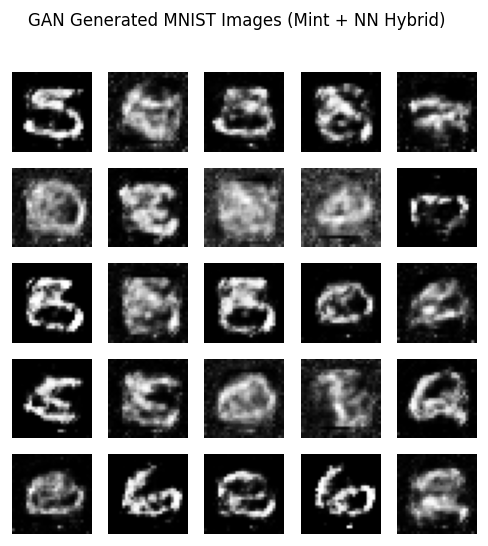

In [12]:
if __name__ == "__main__":
    # 关键修复：重新定义推理用的批量，避免被数据集的batch_size=128覆盖
    gen_batch_size = 25  # 明确指定生成25张图，与5×5网格匹配
    
    # 实例化生成器（会打印真实参数名）
    net_g = GenHybrid()
    # 加载权重（精准匹配参数名）
    net_g = load_weights_fixed(net_g)
    
    # 生成25个样本的隐码（用gen_batch_size，确保是25个）
    test_data = ms.Tensor(np.random.normal(0, 1, (gen_batch_size, latent_size)).astype(np.float32))
    # 推理生成图像（输出形状：[25,1,28,28]）
    print("\n开始生成25张手写数字图像...")
    images = net_g(test_data).transpose(0, 2, 3, 1).asnumpy()  # 形状：[25,28,28,1]
    
    # 结果展示（循环用gen_batch_size，确保i+1≤25）
    fig = plt.figure(figsize=(5, 5), dpi=120)  # 放大图尺寸，更清晰
    # 进度条显示“Generating MNIST images: 100%|xxx| 25/25”
    for i in tqdm(range(gen_batch_size), desc="Generating MNIST images"):
        # i+1范围：1~25，完全匹配5×5网格的子图编号
        fig.add_subplot(5, 5, i + 1)
        plt.axis("off")
        plt.imshow(images[i].squeeze(), cmap="gray")  # 单通道显示
    
    # 直接显示图像
    plt.suptitle("GAN Generated MNIST Images (Mint + NN Hybrid)", fontsize=10)
    plt.show()

本案例已同步上线 [GitHub 仓](https://github.com/mindspore-courses/orange-pi-mindspore/tree/master/Online/09-GAN)，更多案例开发亦可参考该仓库。

本案例运行所需环境：

- **硬件**：香橙派 AIpro 24G 20T 开发板
- **镜像**：香橙派官网 Ubuntu 镜像
- **CANN**：8.1.RC1
- **MindSpore**：2.6.0